In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv(r"C:\Users\Sandeep\Kaggle\Black Friday\train.csv")

In [39]:
df.shape

(550068, 12)

In [40]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [41]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


<Axes: >

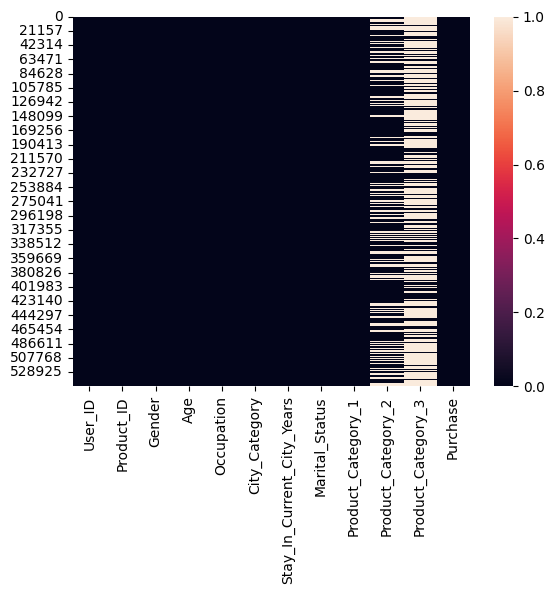

In [46]:
sns.heatmap(df.isnull())

In [47]:
df.fillna(0, inplace = True)

In [55]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     550068 non-null  int64
 1   Product_ID                  550068 non-null  int64
 2   Gender                      550068 non-null  int64
 3   Age                         550068 non-null  int64
 4   Occupation                  550068 non-null  int64
 5   City_Category               550068 non-null  int64
 6   Stay_In_Current_City_Years  550068 non-null  int64
 7   Marital_Status              550068 non-null  int64
 8   Product_Category_1          550068 non-null  int64
 9   Product_Category_2          550068 non-null  int64
 10  Product_Category_3          550068 non-null  int64
 11  Purchase                    550068 non-null  int64
dtypes: int64(12)
memory usage: 50.4 MB


In [87]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le =LabelEncoder()
for i in df.select_dtypes('object').columns :
  df[i]=le.fit_transform(df[i])

In [88]:
SS = StandardScaler()
df_SS = pd.DataFrame(SS.fit_transform(df), columns=df.columns)

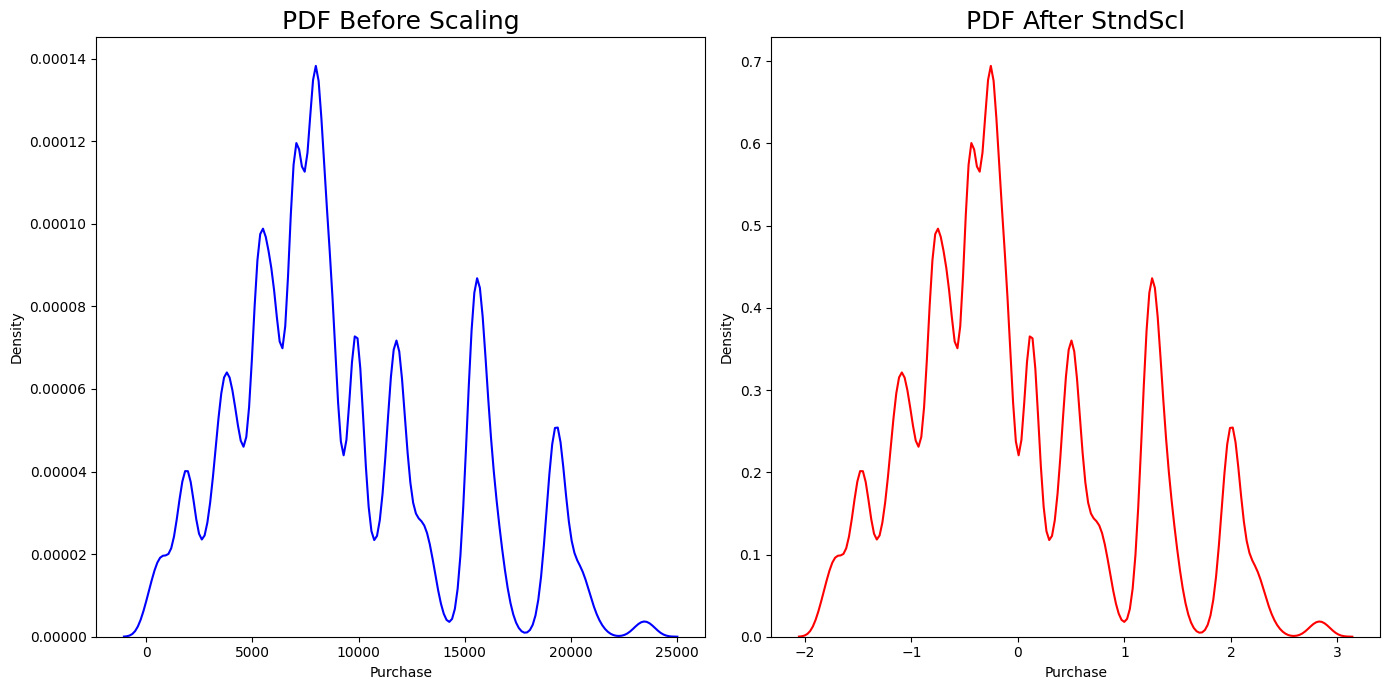

In [89]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("PDF Before Scaling", fontsize=18)
sns.kdeplot(data=df['Purchase'], color="blue")
plt.subplot(1, 2, 2)
plt.title("PDF After StndScl", fontsize=18)
sns.kdeplot(data=df_SS['Purchase'], color="red")
plt.tight_layout()
plt.show()

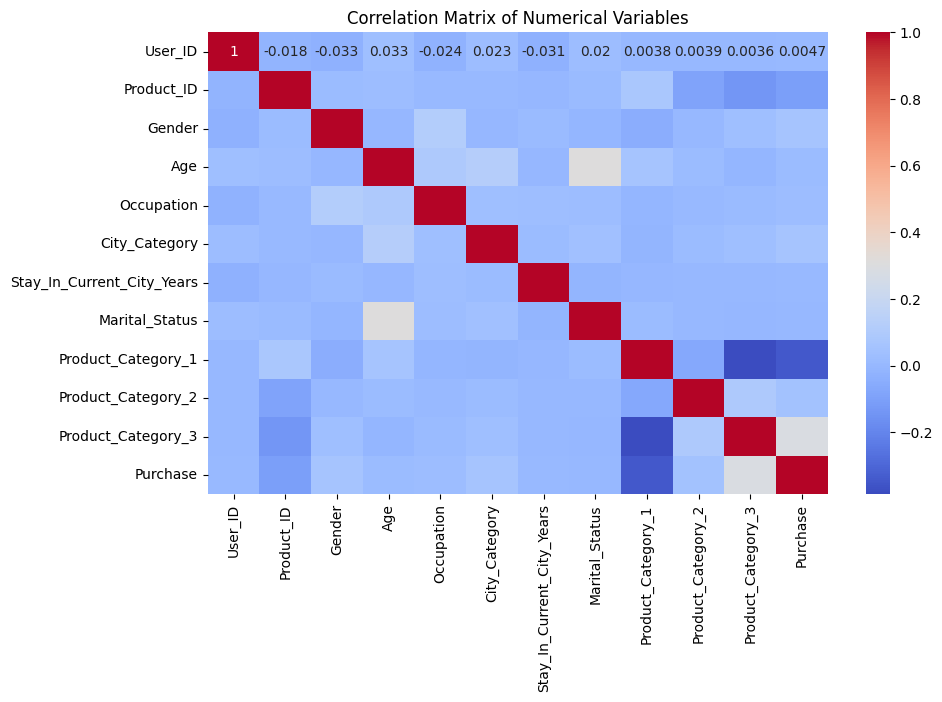

In [100]:
num_cols = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']

corr_matrix = df[num_cols].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

C:\Users\Sandeep\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


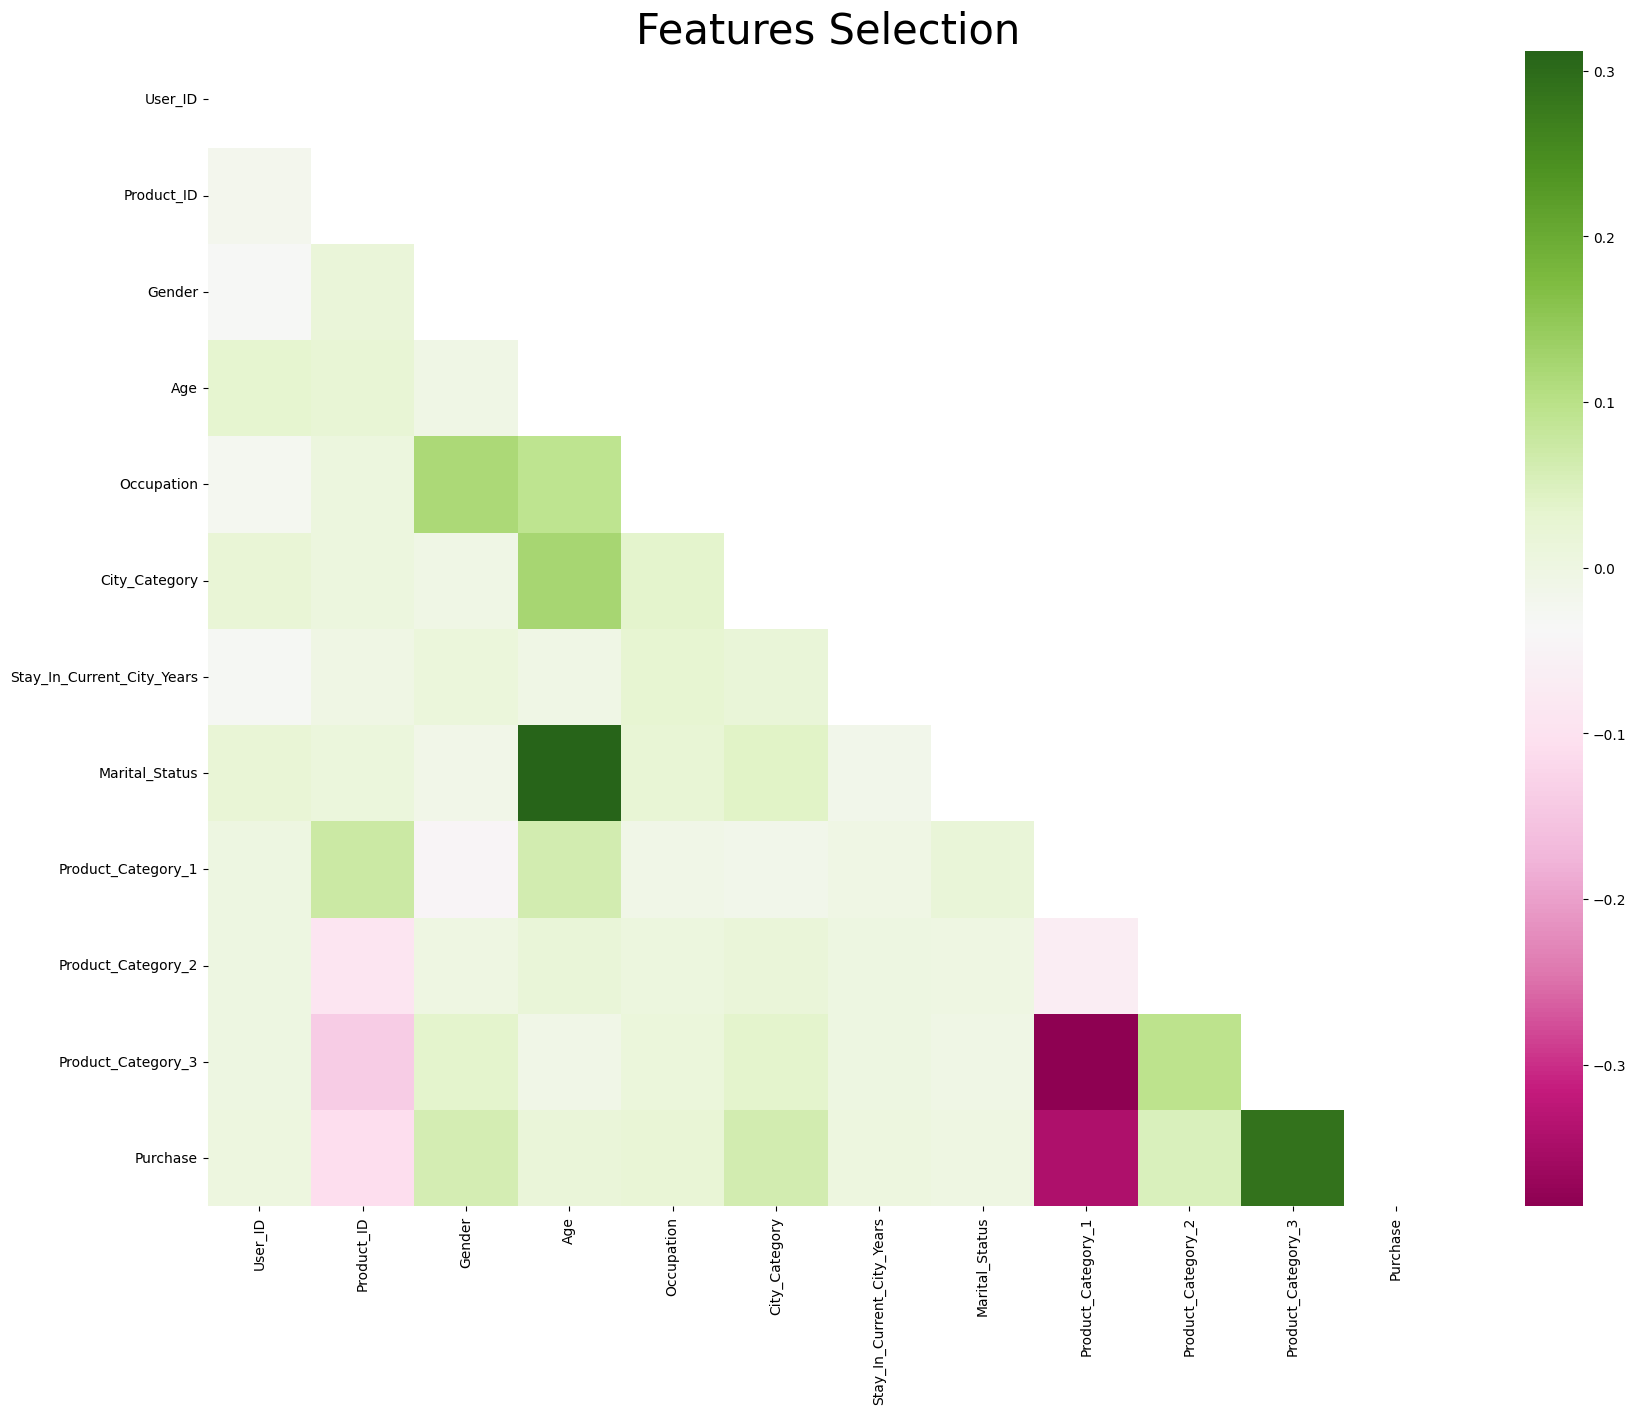

In [106]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df_SS.corr()))
sns.heatmap(df_SS.corr(), annot = True, mask = mask,cmap = "PiYG")
plt.title('Features Selection', fontsize = 30)
plt.show()

In [105]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,0,0,8370
1,1000001,2376,0,0,10,0,2,0,1,6,14,15200
2,1000001,852,0,0,10,0,2,0,12,0,0,1422
3,1000001,828,0,0,10,0,2,0,12,14,0,1057
4,1000002,2734,1,6,16,2,4,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,1,20,0,0,368
550064,1006035,3568,0,2,1,2,3,0,20,0,0,371
550065,1006036,3568,0,2,15,1,4,1,20,0,0,137
550066,1006038,3568,0,6,1,2,2,0,20,0,0,365


In [104]:
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)